# LTV | CAC metrics - ru

В данных могут встречаться ошибки, поэтому чтобы получить правильные выводы стоит сразу проверить нет ли каких-то явных ошибок в данных, обычно их можно найти, отсортировав данные. Слишком маленькие значения всплывут, а слишком большие утонут и их будет видно на фоне всех остальных.

Приступим к выполнению его главного задачи - подсчету эффективности каналов привлечения.
В прикрепленном файле содержится статистика по клиентам, привлеченных по каждому из каналов - в формате таблицы.

**Таблица содержит колонки:**
- id клиента - номер клиента
- Канал привлечения - канал из которого пришел клиент
- LTV клиента, руб

**При условии что общие издержки на каждый из каналов составили:**
- Таргетная реклама - 100 000 руб
- e-mail рассылки - 25 000 руб
- Реклама у блогеров - 120 000 руб
- Контекстная реклама - 90 000 руб
- Нативная реклама - 70 000 руб
- Реклама в новостных СМИ - 60 000 руб

**Нужно определить:**
- какие каналы окупаются
- какой из них самый прибыльный с точки зрения прибыли на один юнит.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel('LTV_metrics.xlsx')
df.head()

,Канал привлечения,"LTV, руб."
0,Реклама у блогеров,90
1,Реклама в новостных СМИ,120
2,Реклама в новостных СМИ,240
3,Контекстная реклама,590
4,Контекстная реклама,670


In [3]:
df = df.rename(columns=({'Канал привлечения': 'Channel', 'LTV, руб.': 'LTV'}))
df.head()

,Channel,LTV
0,Реклама у блогеров,90
1,Реклама в новостных СМИ,120
2,Реклама в новостных СМИ,240
3,Контекстная реклама,590
4,Контекстная реклама,670


**Сгруппируем данные по каналу рекламы и посчитаем суммарное LTV**

In [4]:
df_ltv = df[['Channel', 'LTV']].groupby(by=['Channel']).sum().sort_values(by='LTV').reset_index()
df_ltv

,Channel,LTV
0,e-mail рассылки,23480
1,Таргетная реклама,48810
2,Реклама в новостных СМИ,70920
3,Контекстная реклама,97850
4,Нативная реклама,98370
5,Реклама у блогеров,150940


In [5]:
df_cac = pd.DataFrame({'Channel': 
                       ['e-mail рассылки', 'Контекстная реклама', 'Нативная реклама','Реклама в новостных СМИ','Реклама у блогеров', 'Таргетная реклама'],
                       'LTV': [25000, 90000, 70000, 60000, 120000, 100000]}).sort_values(by='LTV').reset_index()


<AxesSubplot:xlabel='LTV', ylabel='Channel'>

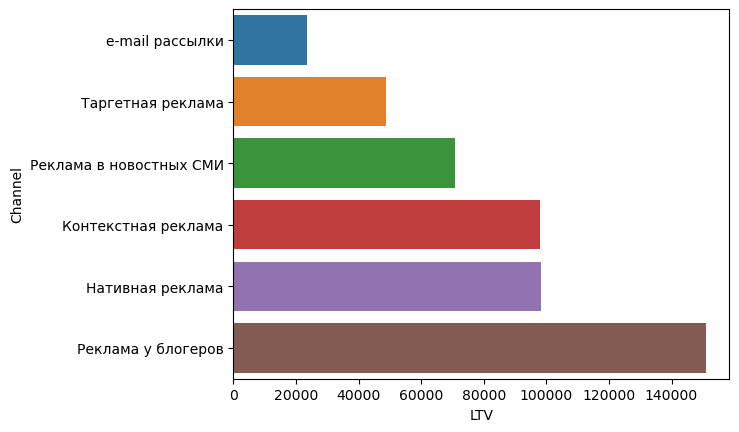

In [6]:
sns.barplot(data = df_ltv, x = 'LTV', y = 'Channel')

<AxesSubplot:xlabel='LTV', ylabel='Channel'>

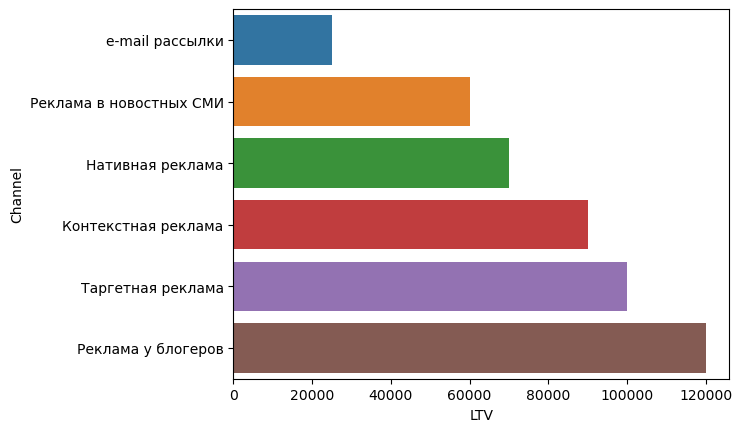

In [7]:
sns.barplot(data = df_cac, x = 'LTV', y = 'Channel')

**Оценим, какие из перечисленных каналов положительны для нас в плане прибыли**

In [8]:
df_ltv['LTV'] - df_cac['LTV']

0    -1520
1   -11190
2      920
3     7850
4    -1630
5    30940
Name: LTV, dtype: int64

**Видим, что наиболее выгодным каналом дохода является Нативная реклама, а в целом имеют положительный LTV только**
- Реклама в новостных СМИ
- Контекстная реклама
- Нативная реклама